In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import functions as f
%matplotlib inline

# Read the data from a CSV file
# Original source of data: https://insights.stackoverflow.com/survey
df = pd.read_csv('data/survey_results_public.csv')
df_schema= pd.read_csv('data/survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [2]:
#Find the Column with the question regarding the importance of formal education to the career
df_schema[df_schema["QuestionText"].str.contains("seeking")].values

array([['JobSeek',
        'Which of the following best describes your current job-seeking status?']],
      dtype=object)

In [3]:
#How many have answered the question?
df["JobSeek"].notnull().mean()

0.8024541971114317

In [4]:
#What are the answer options and how often were they given?
df["JobSeek"].value_counts()

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64

In [5]:
#Set order
job_seeking_order=['I am not interested in new job opportunities',
                   'I’m not actively looking, but I am open to new opportunities',
                   'I am actively looking for a job']

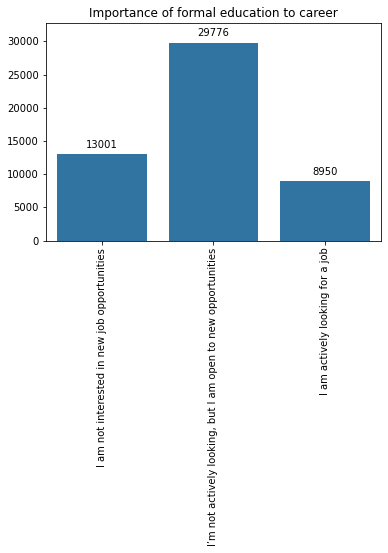

In [6]:
#Plot
f.plot_job_seeking(df);

In [7]:
#Find the Column with the question regarding the size of company
df_schema[df_schema["QuestionText"].str.contains("employed")].values

array([['OrgSize',
        'Approximately how many people are employed by the company or organization you currently work for?']],
      dtype=object)

In [8]:
#What were the different company sizes in the survey and what is the distribution?
df["OrgSize"].value_counts()

20 to 99 employees                                    9597
100 to 499 employees                                  8311
10,000 or more employees                              6149
1,000 to 4,999 employees                              4863
2 to 9 employees                                      4409
10 to 19 employees                                    4127
500 to 999 employees                                  2880
Just me - I am a freelancer, sole proprietor, etc.    2190
5,000 to 9,999 employees                              1808
Name: OrgSize, dtype: int64

In [9]:
org_size_order = ['Just me - I am a freelancer, sole proprietor, etc.',
                    '2 to 9 employees', '10 to 19 employees','20 to 99 employees', '100 to 499 employees',
                    '500 to 999 employees',  '1,000 to 4,999 employees',
                    '5,000 to 9,999 employees','10,000 or more employees']     

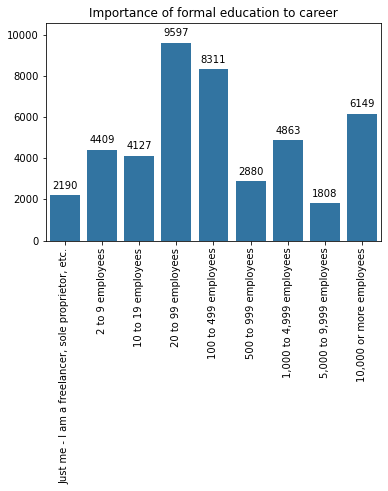

In [10]:
#Plot the company sizes
f.plot_company_size(df)

In [11]:
#The next step is to create a facet plot for all company sizes

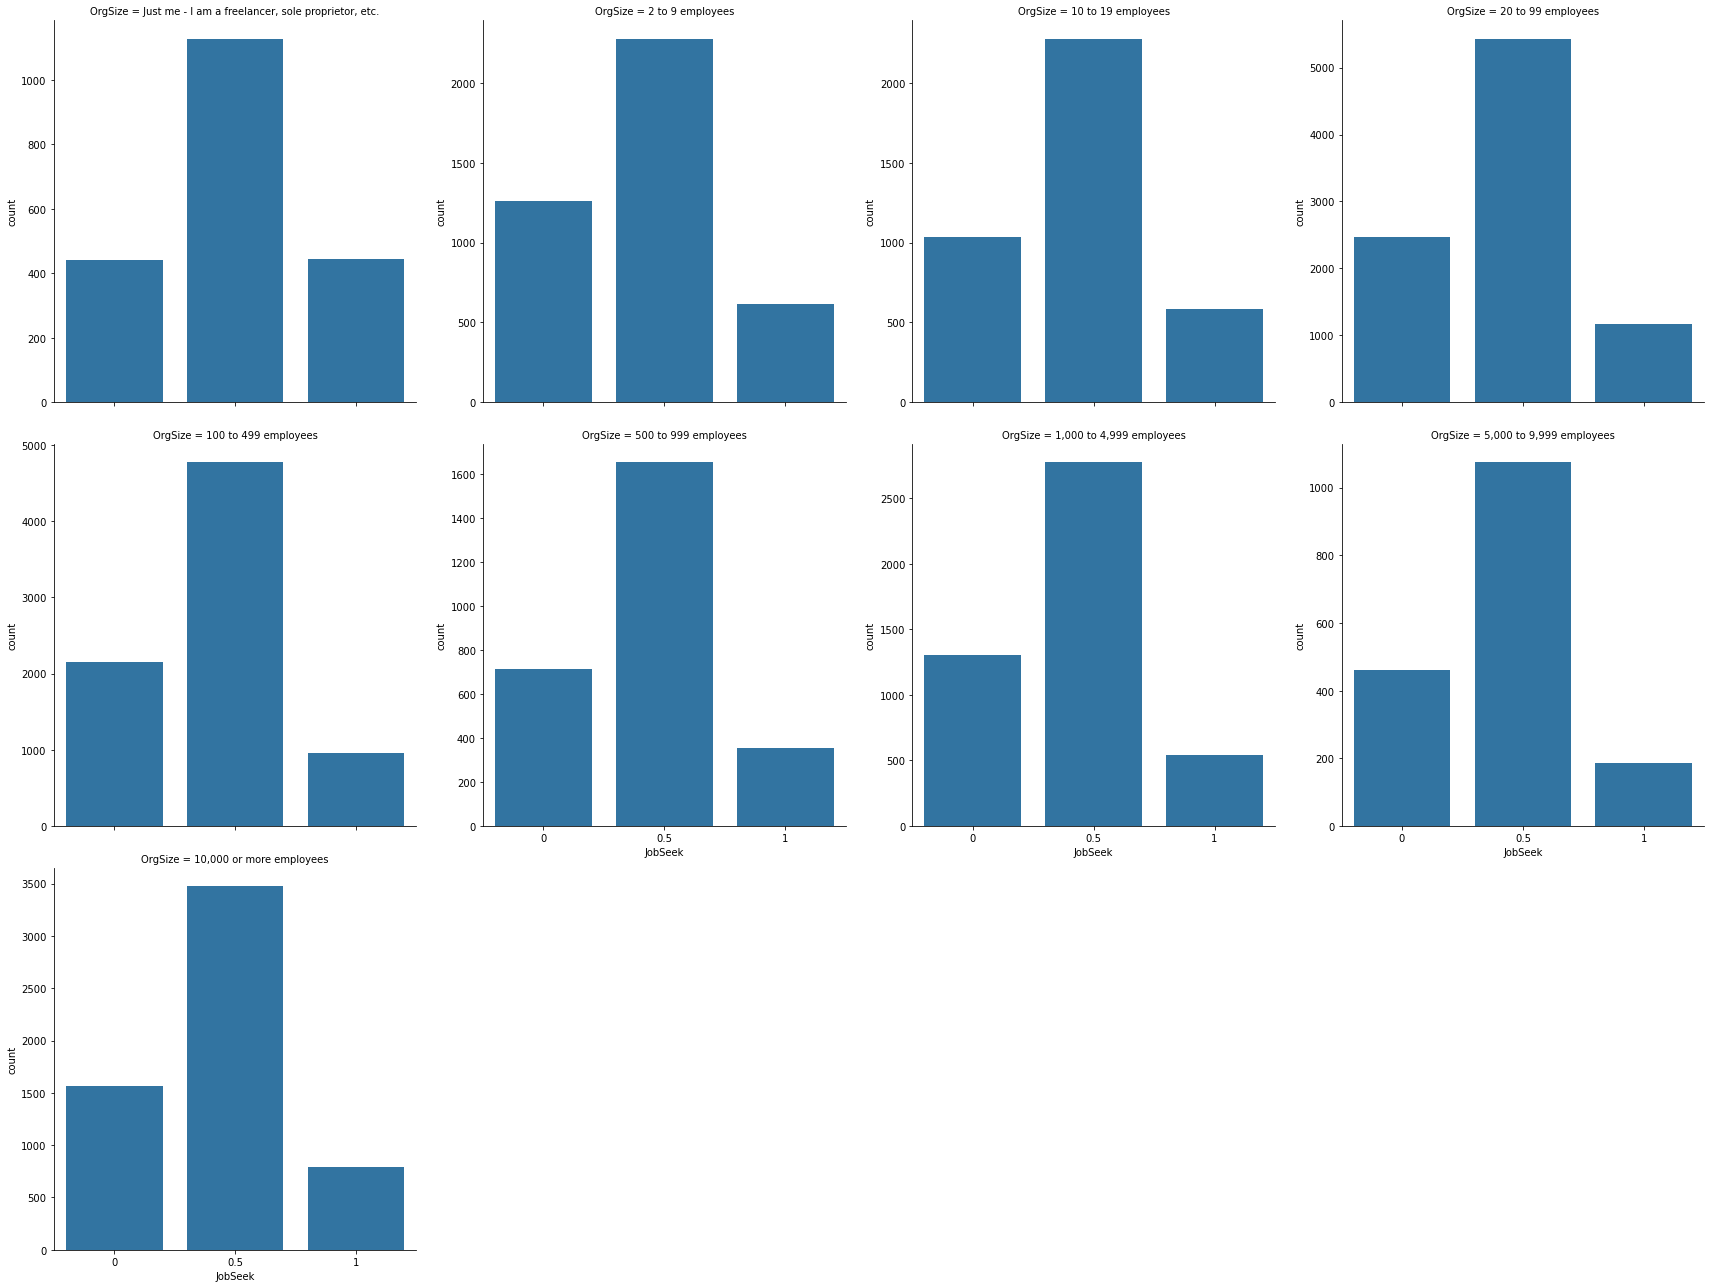

In [12]:
# plot
base_color = sb.color_palette()[0]
plot_org_size_job_seeking = sb.FacetGrid(data = df, col = "OrgSize", height = 6,
col_wrap = 4, sharey=False, col_order= org_size_order)
plot_org_size_job_seeking.map(sb.countplot,"JobSeek", color = base_color, order = job_seeking_order)
plot_org_size_job_seeking.set_xticklabels([0,0.5,1]);

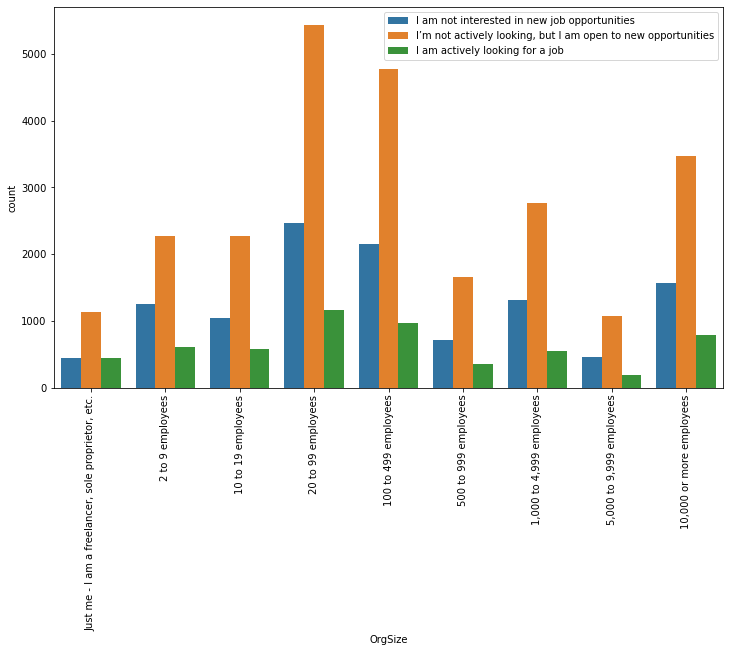

In [13]:
plt.subplots(figsize = (12,7))
sb.countplot(data = df, x = "OrgSize", hue = "JobSeek", order = org_size_order, hue_order = job_seeking_order)
plt.xticks(rotation=90) 
plt.legend();

In [14]:
#This plot is not meaningful because of the different absolute values. We need to create an plot with normalized values.

In [61]:
df_count_jsos = pd.DataFrame()
for size in org_size_order:
    df_count_jsos[size]=df[df["OrgSize"]==size]["JobSeek"].value_counts(normalize=True)
df_count_jsos["sort"]=[0.5,1,0]
df_count_jsos=df_count_jsos.sort_values(["sort"])
df_count_jsos=df_count_jsos.drop(["sort"], axis=1)
df_count_jsos=df_count_jsos.rename(columns={"Just me - I am a freelancer, sole proprietor, etc.":
                                            "freelancer, sole proprietor, etc."})

In [62]:
df_count_jsos

,"freelancer, sole proprietor, etc.",2 to 9 employees,10 to 19 employees,20 to 99 employees,100 to 499 employees,500 to 999 employees,"1,000 to 4,999 employees","5,000 to 9,999 employees","10,000 or more employees"
I am not interested in new job opportunities,0.218688,0.303206,0.266222,0.271935,0.272716,0.262385,0.282439,0.267131,0.268565
"I’m not actively looking, but I am open to new opportunities",0.560636,0.548807,0.584252,0.599603,0.604993,0.606606,0.599697,0.624274,0.596124
I am actively looking for a job,0.220676,0.147987,0.149526,0.128463,0.122291,0.131009,0.117863,0.108595,0.135311


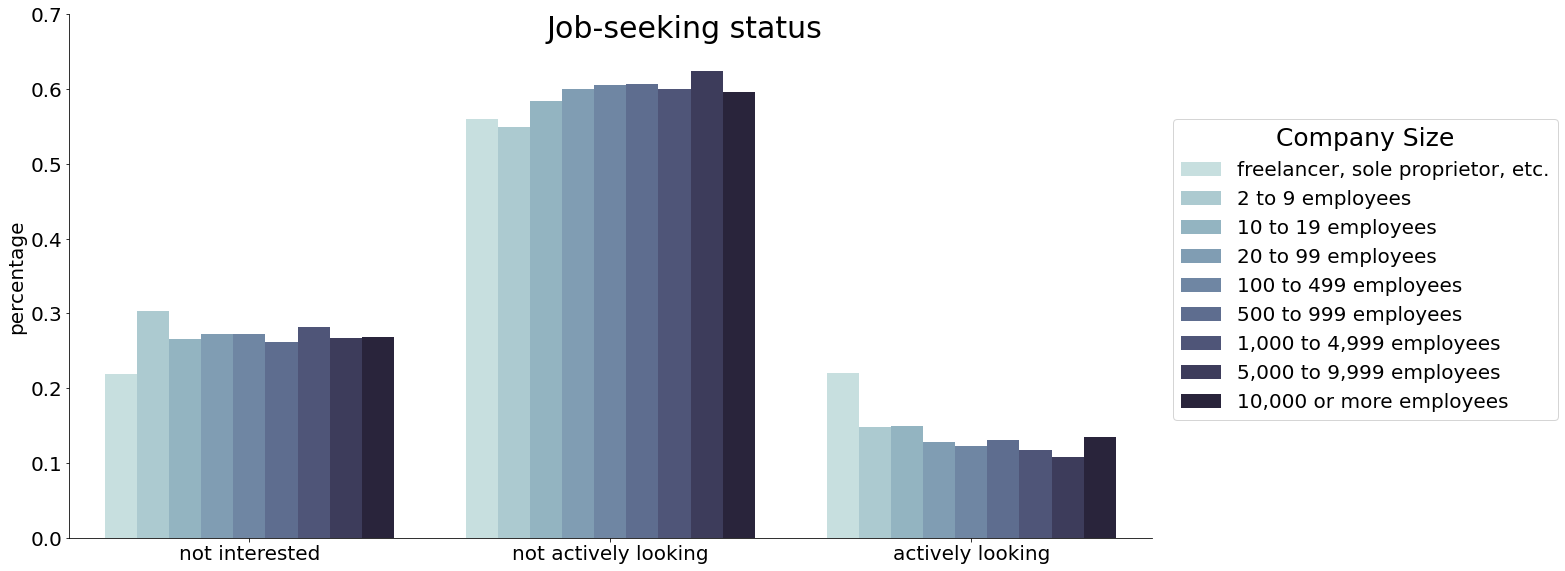

In [77]:
df_count_jsos_melt = pd.melt(df_count_jsos.reset_index(), id_vars="index", var_name="OrgSize", value_name="Perc")

plot_org_size_job_seeking2=sb.catplot( data=df_count_jsos_melt, x="index", y="Perc", hue="OrgSize",kind="bar", 
                                      height=8,aspect = 2, palette =sb.color_palette("ch:start=.2,rot=-.3",9))
plot_org_size_job_seeking2.set(xlabel=None,ylabel=None)
plot_org_size_job_seeking2._legend.remove()
plt.legend(bbox_to_anchor=(1.02, 0.8), loc="upper left", borderaxespad=0, fontsize =20, title = "Company Size",
           title_fontsize =25 )
plot_org_size_job_seeking2.set_xticklabels(["not interested", "not actively looking", "actively looking"], size=20)
plot_org_size_job_seeking2.set_yticklabels(size=20)
plt.ylabel('percentage', fontsize=20)
plot_org_size_job_seeking2.fig.suptitle("Job-seeking status", size=30);

In [18]:
#It appears that company size does not have a significant impact on the decision to change jobs. 
#Only self-employed people are more likely to look for another job.